In [341]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 

# data read
df = pd.read_csv('Kia_dataset.csv', encoding='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
print(df.head())
print("@데이터 차원 확인\n","(데이터 수, 변수) =",df.shape,"\n\n")
print(df.info(verbose=True))

      GOODNO   SUCCYMD                     CARNM             CHASNO  \
0  1512A2469  20160105     모닝 LPi LX 기본 블랙 프리미엄   KNABK518BBT020038   
1  1512A2364  20160105  K3 1.6 가솔린(4도어) Nobless   KNAFZ412BDA040155   
2  1512A2319  20160105   K3 1.6 가솔린(4도어) Trendy   KNAFK412BEA206484   
3  1512A1643  20160105        K5 2.0LPI 렌터카 디럭스   KNAGN418BDA366086   
4  1512A1371  20160105        K5 2.0LPI 렌터카 스마트   KNAGN415BBA140279   

   CARREGIYMD  YEAR MISSNM FUELNM COLOR  EXHA  ...  SUNLOOPPANORAMA  \
0  20100616.0  2011    A/T    LPG     C  1000  ...                0   
1  20130207.0  2013    A/T    가솔린     A  1600  ...                0   
2  20140128.0  2014    A/T    가솔린     A  1591  ...                0   
3  20121218.0  2013    A/T    LPG     B  2000  ...                0   
4  20110428.0  2011    A/T    LPG     D  2000  ...                0   

  SUNLOOPCOMMON SUNLOOPDUAL DIS  TCS  AB1 ETC  AV  EPS  ECS  
0             0           0   0    0    1   0   0    0    0  
1             0       

In [342]:
#############################################################
# 목차
#1. Null Value 처리
#2. 변수 유형 파악 및 올바른 데이터 타입 설정
#3. 교환,판금,옵션 변수 차원 축소
#4. 이상치 처리
#5. 파생변수 생성
#6. 범주형 변수 인코딩
#7. 수치형 변수 정규화
#8. 파라미터 서치
#9. 랜덤 포레스트 모델 결과 및 변수 중요도 파악
#############################################################

In [343]:
%matplotlib inline
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 


#변수형에 따라 전처리하기 위해 list 생성
categorical_var_list = [
    'GOODNO', 'CARNM', 'CHASNO', 'YEAR','YEARCHK', 'INNEEXPOCLASCD_YN', 'MISSNM', 'FUELNM', 'COLOR',
    'OWNECLASNM', 'USEUSENM', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY',
    'DT_GRADE_KEY', 'NC_GRADE_KEY'
]

numeric_var_list = [
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NEWCARPRIC','NC_GRADE_PRICE',
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'TRUNK',
    'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A',
    'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER',
    'RIGHT_REAR_FENDER', 'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME', 'LEFT_QUARTER',
    'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL', 'RIGHT_SIDE_PANEL',
    'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'BACK_PANEL2',
    'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL',
    'SIDE_MEMBER_FRAME2', 'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING', 'SHEET_BACK_PANEL_SHEETING',
    'SIDE_MEMBER_FRAME_SHEETING', 'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING',
    'RIGHT_SIDE_PANEL_SHEETING', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON',
    'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

missing_list =[
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NC_GRADE_PRICE', 'NEWCARPRIC', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY','NC_GRADE_KEY','SHIPPING_PRICE'
]


In [344]:
#1. Null Value 처리

#1-1 각 컬럼별로 null 값의 비율을 확인
def NullFunc(df_):
    #0값 결측값으로 변환
    for i in missing_list:
        df_[i] = df_[i].replace(0, np.nan)
        df_[i] = df_[i].replace('0', np.nan)

    for i in df_.columns:
        X_i = df_.loc[:, i]
        notNullRatio = X_i.dropna().shape[0] / df_.shape[0]
        if (notNullRatio != 1):
            print("column {} have {} null value".format(i, df_.shape[0]-X_i.dropna().shape[0]),
                  '\n')
            #del_col_list.append(i) 결측값 많을 시 추가
    print(msno.matrix(df_))
    print(df_.isnull().sum())
    return df_

In [345]:
#2. 변수 유형 파악 및 올바른 데이터 타입 설정

import datetime
import math
def ChangeType(df_):
   #2-1 categoric, numeric
   for i in categorical_var_list:
       df_[i]=df_[i].astype('object', errors='ignore')
   for i in numeric_var_list:
       df_[i]=df_[i].astype('int64', errors='ignore')

   #2-2 datetime
   df_['SUCCYMD'] = pd.to_datetime(df_['SUCCYMD'], format='%Y%m%d') 
   df_['CARREGIYMD'] = pd.to_datetime(df_['CARREGIYMD'], format='%Y%m%d') 

   #2-3 값 대체
   #YEARCHK (Y, N) -> (1, 0)
   for i in np.where(df_['YEARCHK']=='Y'):
    df_['YEARCHK'][i]=1
   for i in np.where(df_['YEARCHK']=='N'):
    df_['YEARCHK'][i]=0

   #INNEEXPOCLASCD_YN (O, X) -> (1, 0)
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='O'):
    df_['INNEEXPOCLASCD_YN'][i]=1
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='X'):
    df_['INNEEXPOCLASCD_YN'][i]=0

    print(df_.dtypes)
    return df_

In [346]:
#3. 교환,판금,옵션 변수 차원 축소

#3-1. 사고 때문에 발생한 교환 및 판금 변수 들의 차원 축소
#전손, 침수 등의 심각한 영향을 끼치는 요인 통합
def cal_accidents(df):
    accident1 = []
    accident2 = []
    accident3 = []
    accident4 = []
    ### 무사고 or 유사고
    accident1 = np.array(df.loc[:,'BONET']+df.loc[:,'FRONT_LEFT_FENDER']
                     +df.loc[:,'FRONT_RIGHT_FENDER']+df.loc[:,'FRONT_LEFT_DOOR']
                     +df.loc[:,'FRONT_RIGHT_DOOR']+df.loc[:,'BACK_LEFT_DOOR']
                     +df.loc[:,'BACK_RIGHT_DOOR']+df.loc[:,'TRUNK'])
    ### 심각한 유사고
    accident2 = np.array(df.loc[:,'FRONT_PANNEL']+df.loc[:,'LEFT_STEP']
                     +df.loc[:,'RIGHT_STEP']+df.loc[:,'LEFT_FILER_A']
                     +df.loc[:,'RIGHT_FILER_A']+df.loc[:,'LEFT_FILER_B']
                     +df.loc[:,'RIGHT_FILER_B']+df.loc[:,'LEFT_FILER_C']
                     +df.loc[:,'RIGHT_FILER_C']+df.loc[:,'LEFT_REAR_FENDER']
                     +df.loc[:,'RIGHT_REAR_FENDER']+df.loc[:,'BACK_PANEL1']
                     +df.loc[:,'LEFT_QUARTER']+df.loc[:,'LEFT_FILER_C']
                     +df.loc[:,'LEFT_REAR_CORNER_PANEL']+df.loc[:,'RIGHT_REAR_CORNER_PANEL']
                     +df.loc[:,'BACK_PANEL2']+df.loc[:,'LEFT_CORNER_PANEL']
                     +df.loc[:,'RIGHT_CORNER_PANEL']+df.loc[:,'LEFT_SKIRT_PANEL']
                     +df.loc[:,'RIGHT_SKIRT_PANEL']+df.loc[:,'SIDE_MEMBER_FRAME2'])
    ### 판금도 가능했던 심각한 유사고
    accident3 = np.array(df.loc[:,'LEFT_INSIDE_PANEL']+df.loc[:,'RIGHT_INSIDE_PANEL']
                     +df.loc[:,'LEFT_WHEEL_HOUSE']+df.loc[:,'RIGHT_WHEEL_HOUSE']
                     +df.loc[:,'LEFT_INSIDE_WHEEL_HOUSE']+df.loc[:,'RIGHT_INSIDE_WHEEL_HOUSE']
                     +df.loc[:,'LEFT_REAR_WHEEL_HOUSE']+df.loc[:,'RIGHT_REAR_WHEEL_HOUSE']
                     +df.loc[:,'TRUNK_FLOOR']+df.loc[:,'DASH_PANEL']
                     +df.loc[:,'SHEET_PANEL']+df.loc[:,'SIDE_MEMBER_FRAME']
                     +df.loc[:,'FLOOR_PANEL']+df.loc[:,'LEFT_SIDE_PANEL']
                     +df.loc[:,'RIGHT_SIDE_PANEL'])
    ###사고는 컸지만 수리가 가벼움
    accident4 =  np.array(df.loc[:,'LEFT_INSIDE_SHEETING']+df.loc[:,'RIGHT_INSIDE_SHEETING']
                     +df.loc[:,'LEFT_WHEEL_HOUSE_SHEETING']+df.loc[:,'RIGHT_WHEEL_HOUSE_SHEETING']
                     +df.loc[:,'LEFT_REAR_INSIDE_PANEL_SHEETING']+df.loc[:,'RIGHT_REAR_INSIDE_PANEL_SHEETING']
                     +df.loc[:,'LEFT_REAR_WHEEL_HOUSE_SHEETING']+df.loc[:,'RIGHT_REAR_WHEEL_HOUSE_SHEETING']
                     +df.loc[:,'TRUNK_FLOOR_SHEETING']+df.loc[:,'DASH_PANEL_SHEETING']
                     +df.loc[:,'SHEET_BACK_PANEL_SHEETING']+df.loc[:,'SIDE_MEMBER_FRAME_SHEETING']
                     +df.loc[:,'FLOOR_PANEL_SHEETING']+df.loc[:,'LEFT_SIDE_PANEL_SHEETING']
                     +df.loc[:,'RIGHT_SIDE_PANEL_SHEETING'])
    
    df['ACCI1'] = accident1
    df['ACCI2'] = accident2
    df['ACCI3'] = accident3
    df['ACCI4'] = accident4
    
    #참수, 전손, 접합, 운행불가는 하나만 존재해도 가격에 심각한 악영향을 끼치는 것으로 판단하여 통합
    trash = []
    for a,b,c,d in np.array(df[['FLOODING', 'TOTAL_LOSS','JOINCAR','NOTAVAILABLE']]):
        if (a + b + c + d) > 0:
            trash.append(1)
        else:
            trash.append(0)
     
    df['TRASHCAR'] = trash
    
    return df

In [347]:
#3-2. 옵션을 3가지로 분류하여 옵션 수의 총 합으로 차원을 축소
#총 3가지의 옵션으로 나눔. 편리, 안전, 운전
def cal_options(df):
    sun_loop = []
    safety_op = []
    driving_op = []
    comfort_op = []
    
    for a,b,c in np.array(df[['SUNLOOPPANORAMA', 'SUNLOOPCOMMON','SUNLOOPDUAL']]):
        if (a==1) or (b==1) or (c==1):
            sun_loop.append(1)
        else:
            sun_loop.append(0)
    
    df['SUNLOOP'] = sun_loop
    #편리 기능 옵션 합계
    comfort_opp = np.array(df.loc[:,'NAVIGATION']+df.loc[:,'SMARTKEY']
                     +df.loc[:,'SUNLOOP']+df.loc[:,'ETC']+df.loc[:,'AV'])
    #안전 기능 옵션 합계
    safety_opp = np.array(df.loc[:,'ABS']+df.loc[:,'AB2']+df.loc[:,'VDC']
                     +df.loc[:,'DIS']+df.loc[:,'TCS']+df.loc[:,'AB1'])
    #운전 기능 옵션 합계
    driving_opp = np.array(df.loc[:,'EPS']+df.loc[:,'ECS'])
    
    df['SAFETYOP'] = safety_opp
    df['DRIVEOP'] = driving_opp
    df['COMFORTOP'] = comfort_opp
    
    return df

In [348]:
#4. 이상치 처리

#4-1 이상치 처리를 위한 수치형 변수 시각화
#['YEAR' 'EXHA', 'TRAVDIST', 'NC_GRADE_PRICE', 'SHIPPING_PRICE', 'NEWCARPRIC', 'SUCCPRIC']
def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()



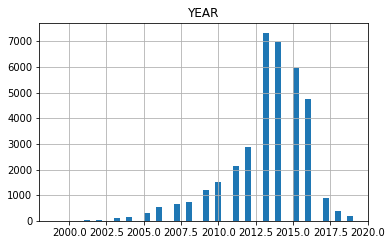

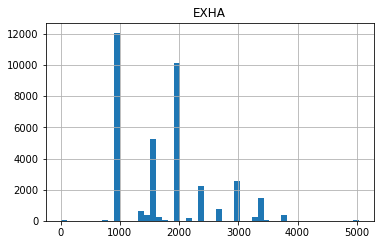

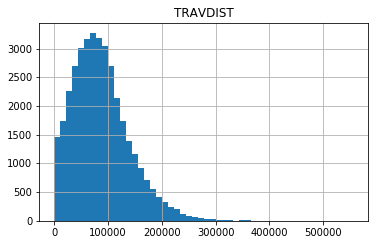

In [349]:
plotHistogram(df, ['YEAR','EXHA', 'TRAVDIST']) 

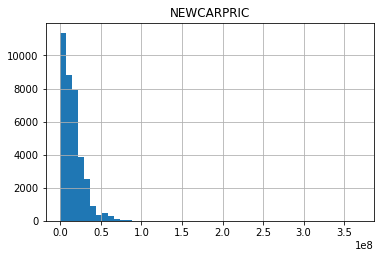

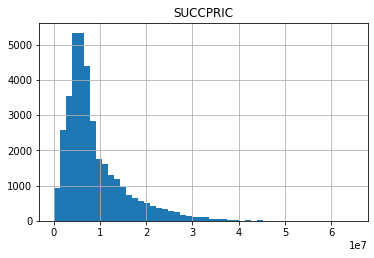

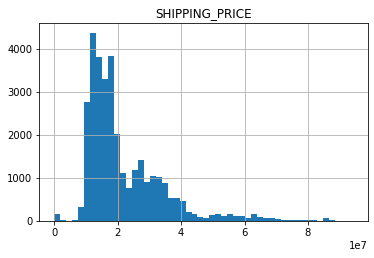

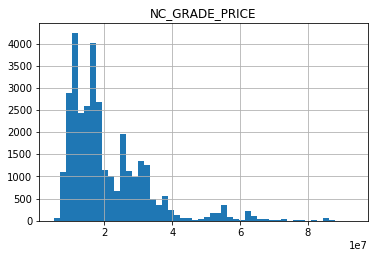

In [350]:
plotHistogram(df, ['NEWCARPRIC','SUCCPRIC','SHIPPING_PRICE','NC_GRADE_PRICE'])

In [351]:
#4-2 이상치 제거
#시각화에서 이상치를 분류하는 기준을 확인
def nan_carprice(x):
    if x<100000:
        return np.nan

def remove_outliers(df_):
    originDataNum = df_.shape[0]
    df_['NEWCARPRIC'] = df_['NEWCARPRIC'].map(nan_carprice)
    df_['NEWCARPRIC'].replace(1,np.nan, inplace=True)
    #배기량은 하위 1%, 상위 1% outlier 제거
    lb_1, ub_1 = np.nanpercentile(df_['EXHA'],[1,99])
    #주행거리는 상위 1% outlier 제거
    lb_2, ub_2 = np.nanpercentile(df_['TRAVDIST'],[1,99])
    #신차등급가격, 출고가, 신차금액은 상위 1% 및 500만원 이하 outlier 제거
    #lb_3 = np.where(df_['NC_GRADE_PRICE']<5000000) 해당 값이 없어서 주석 처리
    lb_4 = np.where(df_['SHIPPING_PRICE']<5000000)
    lb_5 = np.where(df_['NEWCARPRIC']<5000000)
    #낙찰가는 상위 1% outlier 제거

    outliers = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1)
                       |(df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2)
                       |(df_['SHIPPING_PRICE']<5000000)
                       |(df_['NEWCARPRIC']<5000000) ############################
                       )
    df_ = df_.drop(df_.index[outliers[0]])
    
    print("제거된 행 수" , originDataNum-df_.shape[0])    
    return df_, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6

#test data용 outliler
def remove_outliers_test(df_test, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6):
    tmp = pd.DataFrame(df4['EXHA'].groupby(df4['Car_NMFUEL']).mean())
    df_test = pd.merge(left=df_test, right = tmp, how='left', left_on='EXHA', right_on=tmp.index)
    tmp = pd.DataFrame(df4['TRAVDIST'].groupby(df4['Car_NMFUEL']).mean())
    df_test = pd.merge(left=df_test, right = tmp, how='left', left_on='TRAVDIST', right_on=tmp.index)
    tmp = pd.DataFrame(df4['Car_price'].groupby(df4['Car_NMFUEL']).mean())
    df_test = pd.merge(left=df_test, right = tmp, how='left', left_on='NC_GRADE_PRICE', right_on=tmp.index)
    tmp = pd.DataFrame(df4['Car_price'].groupby(df4['Car_NMFUEL']).mean())
    df_test = pd.merge(left=df_test, right = tmp, how='left', left_on='SHIPPING_PRICE', right_on=tmp.index)
    tmp = pd.DataFrame(df4['Car_price'].groupby(df4['Car_NMFUEL']).mean())
    df_test = pd.merge(left=df_test, right = tmp, how='left', left_on='NEWCARPRIC', right_on=tmp.index)
    return df_test

In [352]:
#5. 파생변수 생성

#차량명에서 맨 앞만 따와서 차량명의 새로운 파생변수 생성
#소나타 2017년 하이브리드 -> 소나타
def car_name_split(df):
    func_split = lambda x : x.split()[0]
    df['New_CARNM'] = df['CARNM'].map(func_split)
    df['Car_NMFUEL'] = df['New_CARNM']+ ' '+df['FUELNM']
    return df

In [353]:
# 차량명+연료에 따른 자동차들의 평균값 파생변수 생성
def set_price_mean(df_): 
    df_ship_price_mean = pd.DataFrame(df_['SHIPPING_PRICE'].groupby(df_['Car_NMFUEL']).mean())
    df_nc_price_mean = pd.DataFrame(df_['NC_GRADE_PRICE'].groupby(df_['Car_NMFUEL']).mean())
    df_new_price_mean = pd.DataFrame(df_['NEWCARPRIC'].groupby(df_['Car_NMFUEL']).mean())

    df_list = [df_ship_price_mean,df_nc_price_mean,df_new_price_mean]
    col_list = ['ship_mean','nc_mean','new_mean']

    for dfl,col in zip(df_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format('Car_NMFUEL'), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    return df_, df_ship_price_mean, df_nc_price_mean, df_new_price_mean
# test dataset에는 training set의 자료를 반영
def set_price_mean_test(df_, df_ship_price_mean, df_nc_price_mean, df_new_price_mean): 
    df_list = [df_ship_price_mean,df_nc_price_mean,df_new_price_mean]
    col_list = ['ship_mean','nc_mean','new_mean']

    for dfl,col in zip(df_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format('Car_NMFUEL'), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    return df_

In [354]:
# 결측치를 단순히 대체하는 형식이 아닌 존재하는 값들의 평균을 통해 산출
from tqdm import tqdm
def set_car_price(df):
    df_ = df.copy()
    car_price_list = []
    for i in tqdm(range(df_.shape[0])):
        nan_count = 0
        if np.isnan(df_['SHIPPING_PRICE'][i]):
            nan_count+=1
            df_['SHIPPING_PRICE'][i] = 0
        if np.isnan(df_['NC_GRADE_PRICE'][i]):
            nan_count+=1
            df_['NC_GRADE_PRICE'][i] = 0
        if np.isnan(df_['NEWCARPRIC'][i]):
            nan_count+=1
            df_['NEWCARPRIC'][i] = 0
        if np.isnan(df_['SHIPPING_PRICE_by_ship_mean'][i]):
            nan_count+=1
            df_['SHIPPING_PRICE_by_ship_mean'][i] = 0
        if np.isnan(df_['NC_GRADE_PRICE_by_nc_mean'][i]):
            nan_count+=1
            df_['NC_GRADE_PRICE_by_nc_mean'][i] = 0
        if np.isnan(df_['NEWCARPRIC_by_new_mean'][i]):
            nan_count+=1
            df_['NEWCARPRIC_by_new_mean'][i] = 0
            
        if nan_count!=6: #결측치가 아닌 값들만 반영함

            car_price_list.append((df_['SHIPPING_PRICE'][i] + df_['NC_GRADE_PRICE'][i] + df_['NEWCARPRIC'][i]
                                + df_['SHIPPING_PRICE_by_ship_mean'][i] + df_['NC_GRADE_PRICE_by_nc_mean'][i]
                                + df_['NEWCARPRIC_by_new_mean'][i])/(6-nan_count))

        else:
            car_price_list.append(np.nan)

    df['Car_price'] =  car_price_list   
    return df

In [355]:
#차량 + 연식 변수 생성 : 2011년형 소나타 
def car_year_name(df):
    f_sting = lambda x : str(x)
    df['Car_NMYEAR'] = df['New_CARNM']+ ' ' + df['YEAR'].map(f_sting)
    return df

In [356]:
#연료+차량명, 연식+차량명들의 평균과 표준편차 산출
def set_SUCCPRIC_mean(df_): 
    df_SUCCPRIC_mean_by_NMFUEL = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMFUEL']).mean())
    df_SUCCPRIC_std_by_NMFUEL = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMFUEL']).std())
    df_SUCCPRIC_mean_by_NMYEAR = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMYEAR']).mean())
    df_SUCCPRIC_std_by_NMYEAR = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMYEAR']).std())

    df_list = [df_SUCCPRIC_mean_by_NMFUEL,df_SUCCPRIC_std_by_NMFUEL,
               df_SUCCPRIC_mean_by_NMYEAR,df_SUCCPRIC_std_by_NMYEAR]
    col_list = ['Car_NMFUEL_mean','Car_NMFUEL_std','Car_NMYEAR_mean','Car_NMYEAR_std']
    left_list = ['Car_NMFUEL','Car_NMFUEL','Car_NMYEAR','Car_NMYEAR']

    for dfl,col,left in zip(df_list,col_list,left_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    df_['SUCCPRIC_by_Car_NMFUEL_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)
    df_['SUCCPRIC_by_Car_NMYEAR_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True) 
  
    return df_, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR

#산출된 값을 test dataset에 이용
def set_SUCCPRIC_mean_test(df_, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR):
    df_list = [df_SUCCPRIC_mean_by_NMFUEL,df_SUCCPRIC_std_by_NMFUEL,
               df_SUCCPRIC_mean_by_NMYEAR,df_SUCCPRIC_std_by_NMYEAR]
    col_list = ['Car_NMFUEL_mean','Car_NMFUEL_std','Car_NMYEAR_mean','Car_NMYEAR_std']
    left_list = ['Car_NMFUEL','Car_NMFUEL','Car_NMYEAR','Car_NMYEAR']

    for dfl,col,left in zip(df_list,col_list,left_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    df_['SUCCPRIC_by_Car_NMFUEL_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)
    df_['SUCCPRIC_by_Car_NMYEAR_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)  
    return df_

column CARREGIYMD have 1 null value 

column FUELNM have 1 null value 

column EXHA have 3 null value 

column USEUSENM have 323 null value 

column OWNECLASNM have 13 null value 

column NEWCARPRIC have 4470 null value 

column DT_MODEL_KEY have 3 null value 

column MJ_GRADE_KEY have 33 null value 

column DT_GRADE_KEY have 584 null value 

column NC_GRADE_KEY have 3601 null value 

column SHIPPING_PRICE have 4460 null value 

column NC_GRADE_PRICE have 3781 null value 

AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                                 0
SUCCYMD                                0
CARNM                                  0
CHASNO                                 0
CARREGIYMD                             1
YEAR                                   0
MISSNM                                 0
FUELNM                                 1
COLOR                                  0
EXHA                                   3
TRAVDIST                               0
USEUSENM                       

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

GOODNO                                      object
SUCCYMD                             datetime64[ns]
CARNM                                       object
CHASNO                                      object
CARREGIYMD                          datetime64[ns]
YEAR                                        object
MISSNM                                      object
FUELNM                                      object
COLOR                                       object
EXHA                                       float64
TRAVDIST                                     int64
USEUSENM                                    object
OWNECLASNM                                  object
INNEEXPOCLASCD_YN                           object
NEWCARPRIC                                 float64
SUCCPRIC                                     int64
YEARCHK                                     object
BONET                                        int64
FRONT_LEFT_FENDER                            int64
FRONT_RIGHT_FENDER             

  0%|                            | 0/35843 [00:00<?, ?it/s]D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

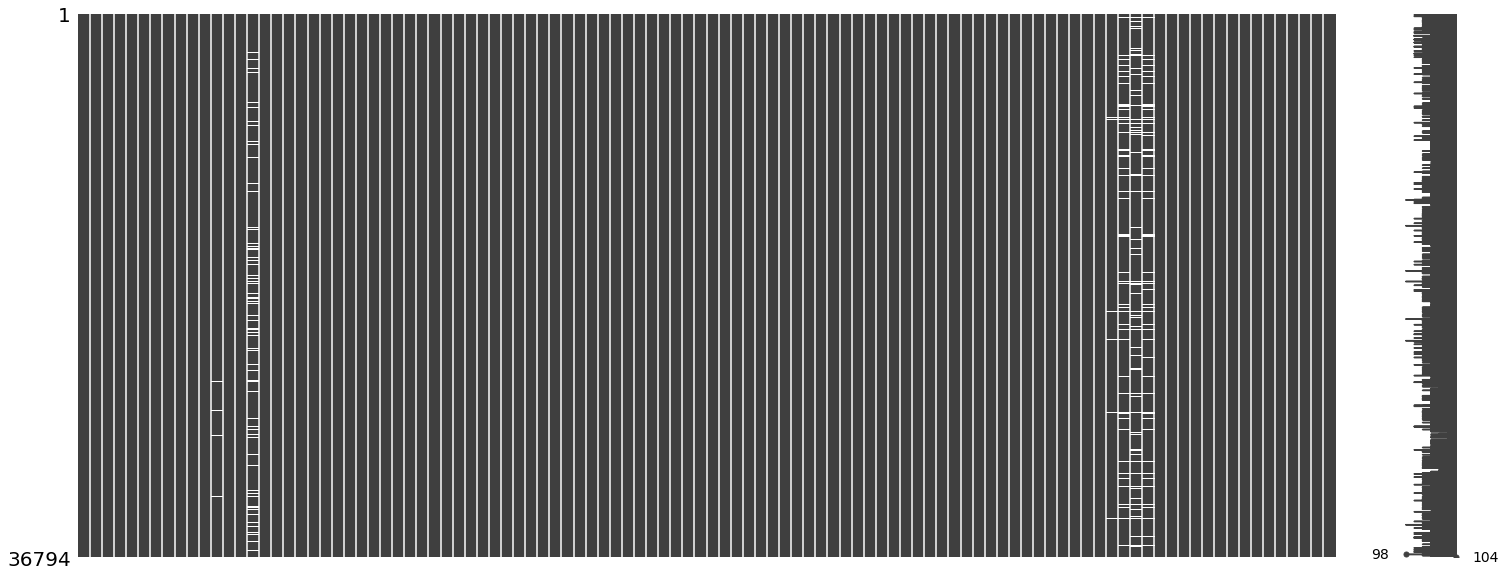

In [357]:
# 정의된 함수 실행
df = NullFunc(df)
df = ChangeType(df)
df1 = df.copy()
df1 = cal_accidents(df1)
df1 = cal_options(df1)
df2 = df1.copy()
df2, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6 = remove_outliers(df2)

df3 = df2.copy()
df3 = car_name_split(df3)
df4 = df3.copy()
df4,df_ship_price_mean, df_nc_price_mean, df_new_price_mean = set_price_mean(df4)
df4 = set_car_price(df4)
df4 = car_year_name(df4)
df4, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR = set_SUCCPRIC_mean(df4)

In [358]:
def cal_days(start, end): #날짜 차이 일(days) 계산용
    return (start-end).days

def make_day(df_): #차량 나이(일)을 파생변수로 추가
    df_['DAY'] = df_.apply(lambda x : cal_days(x['SUCCYMD'],x['CARREGIYMD']),axis=1)
    return df_

In [359]:
#파생 변수에 쓰인 필요없는 자료들 전부 제거
def remove_column(df):
   return df.loc[:,['DAY',
                 'MISSNM','COLOR','EXHA','TRAVDIST','USEUSENM','OWNECLASNM',
                 'INNEEXPOCLASCD_YN','SUCCPRIC','YEARCHK',
                 'ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR',
                 'SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price','SUCCPRIC_by_Car_NMFUEL_mean',
                 'SUCCPRIC_by_Car_NMFUEL_std','SUCCPRIC_by_Car_NMYEAR_mean','SUCCPRIC_by_Car_NMYEAR_std']]

In [360]:
#사용 변수만 추출
df5 = df4.copy()
df5 = make_day(df5)
df5 = remove_column(df5)

#결측행 제거
print(df5.shape)
originNum = df5.shape[0]
df5.dropna(inplace=True)
print('제거된 결측행 수 =', originNum -df5.shape[0])
print(df5.shape)
df5.isnull().sum()

(35843, 23)
제거된 결측행 수 = 330
(35513, 23)


DAY                            0
MISSNM                         0
COLOR                          0
EXHA                           0
TRAVDIST                       0
USEUSENM                       0
OWNECLASNM                     0
INNEEXPOCLASCD_YN              0
SUCCPRIC                       0
YEARCHK                        0
ACCI1                          0
ACCI2                          0
ACCI3                          0
ACCI4                          0
TRASHCAR                       0
SAFETYOP                       0
DRIVEOP                        0
COMFORTOP                      0
Car_price                      0
SUCCPRIC_by_Car_NMFUEL_mean    0
SUCCPRIC_by_Car_NMFUEL_std     0
SUCCPRIC_by_Car_NMYEAR_mean    0
SUCCPRIC_by_Car_NMYEAR_std     0
dtype: int64

In [361]:
#범주형 원 핫 인코딩
CATEGORICAL = ['MISSNM', 'COLOR', 'USEUSENM','OWNECLASNM','YEARCHK','INNEEXPOCLASCD_YN']

def make_cat(df,CATEGORICAL):
    df_ = df.loc[:,['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4',
                    'TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP','Car_price',
                    'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 
                    'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']]
    for i in CATEGORICAL :
        cate_i = pd.get_dummies(df.loc[:, i])
        df_[cate_i.columns] = cate_i
        
    df_.dropna(inplace=True) 
    print(df_.isnull().sum())
    return df_

def make_cat_test(df,CATEGORICAL):
    df_ = df.loc[:,['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4',
                    'TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP','Car_price',
                    'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 
                    'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']]
    for i in CATEGORICAL :
        cate_i = pd.get_dummies(df.loc[:, i])
        df_[cate_i.columns] = cate_i        
    
    print(df_.isnull().sum())
    return df_

df5 = make_cat(df5,CATEGORICAL)    
df5.dtypes

DAY                            0
EXHA                           0
TRAVDIST                       0
ACCI1                          0
ACCI2                          0
ACCI3                          0
ACCI4                          0
TRASHCAR                       0
SAFETYOP                       0
DRIVEOP                        0
COMFORTOP                      0
Car_price                      0
SUCCPRIC_by_Car_NMFUEL_mean    0
SUCCPRIC_by_Car_NMFUEL_std     0
SUCCPRIC_by_Car_NMYEAR_mean    0
SUCCPRIC_by_Car_NMYEAR_std     0
SUCCPRIC                       0
A/T                            0
CVT                            0
M/T                            0
A                              0
B                              0
C                              0
D                              0
F                              0
렌트                             0
리스                             0
사업                             0
업무                             0
자가                             0
개인        

DAY                            float64
EXHA                           float64
TRAVDIST                         int64
ACCI1                            int64
ACCI2                            int64
ACCI3                            int64
ACCI4                            int64
TRASHCAR                         int64
SAFETYOP                         int64
DRIVEOP                          int64
COMFORTOP                        int64
Car_price                      float64
SUCCPRIC_by_Car_NMFUEL_mean    float64
SUCCPRIC_by_Car_NMFUEL_std     float64
SUCCPRIC_by_Car_NMYEAR_mean    float64
SUCCPRIC_by_Car_NMYEAR_std     float64
SUCCPRIC                         int64
A/T                              uint8
CVT                              uint8
M/T                              uint8
A                                uint8
B                                uint8
C                                uint8
D                                uint8
F                                uint8
렌트                       

In [362]:
#y_price 분리
y_price = df5.loc[:, 'SUCCPRIC']
df_ = df5.drop('SUCCPRIC', 1)

In [363]:
#normalize 해야하는 칼럼들 모임
numerical_col = ['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price',
                 'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std']
numerical_col_wY = ['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price',
                 'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']

In [364]:
#traing set 과 validation set으로 분류
def splitData(df, ratio, y_column):
    
    columns_ = df.columns
    # Subsample the data
    mask = list(range(0,df.shape[0], ratio))
    X_val = df.iloc[mask, :].drop(y_column, 1)
    y_val = df.iloc[mask][y_column]
    
    mask = ~df.index.isin(mask)
    X_train = df.loc[mask, :].drop(y_column, 1)
    y_train = df.loc[mask, y_column]
    
    return X_train, y_train, X_val, y_val

In [365]:
X_train, y_train, X_val, y_val = splitData(df5, 5, y_column = 'SUCCPRIC') 

In [366]:
# 수치형 데이터 정규화 함수
def z_normalize(df_, columns):
    if sum(df_.loc[:,columns].std()==0) !=0:
        print(":하나의 값만 존재하는 컬럼이 있음")
        return
    cache = {}
    cache['mean'] = df_.loc[:,columns].mean(axis=0)
    cache['std'] = df_.loc[:,columns].std(axis=0)
    
    return (df_.loc[:,columns] - df_.loc[:,columns].mean(axis=0))/(df_.loc[:,columns].std(axis=0)), cache 

def z_normalize_val(df, columns , cache):
      return(df.loc[:,columns]-cache['mean'])/cache['std']

In [367]:
X_train_norm = X_train.copy()
X_train_norm.loc[:, numerical_col], cache = z_normalize(X_train, numerical_col)
X_val_norm = X_val.copy()
X_val_norm.loc[:, numerical_col] = z_normalize_val(X_val, numerical_col, cache)

In [368]:
X_train_norm

,DAY,EXHA,TRAVDIST,ACCI1,ACCI2,ACCI3,ACCI4,TRASHCAR,SAFETYOP,DRIVEOP,...,자가,개인,개인사업,법인,법인상품,상품용,재외국인,종교단체,0,1
1,-0.644674,-0.250490,-0.485282,-0.807787,-0.331660,-0.196274,-0.602976,-0.258455,0.724280,-0.0634,...,1,0,0,1,0,0,0,0,1,0
2,-1.027607,-0.262967,-0.984193,-0.807787,-0.331660,-0.196274,-0.602976,-0.258455,0.724280,-0.0634,...,1,0,0,1,0,0,0,0,1,0
3,-0.589662,0.304036,0.497787,-0.807787,-0.331660,-0.196274,-0.602976,-0.258455,-0.802681,-0.0634,...,0,0,0,1,0,0,0,0,1,0
4,0.057548,0.304036,-0.086485,1.889636,1.365318,-0.196274,0.965699,-0.258455,-0.802681,-0.0634,...,0,0,0,1,0,0,0,0,1,0
6,-0.583190,0.304036,2.370521,0.091354,1.365318,-0.196274,-0.602976,-0.258455,-0.802681,-0.0634,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35838,-0.110727,-1.085053,-0.486513,-0.807787,-0.331660,-0.196274,-0.602976,-0.258455,0.724280,-0.0634,...,1,0,0,0,1,0,0,0,1,0
35839,-0.046006,2.768907,0.244412,0.091354,-0.331660,-0.196274,0.965699,-0.258455,0.724280,-0.0634,...,1,0,0,0,1,0,0,0,1,0
35840,-0.195943,2.164473,1.389401,0.990495,-0.331660,-0.196274,-0.602976,-0.258455,0.724280,-0.0634,...,0,0,0,0,1,0,0,0,1,0
35841,0.119033,0.302650,1.111505,0.990495,-0.331660,-0.196274,0.181361,-0.258455,-0.802681,-0.0634,...,0,0,0,0,1,0,0,0,1,0


In [369]:
from sklearn.ensemble import RandomForestRegressor

#################################################################################
# TODO: validation dataset을 활용하여 하이퍼 파라미터를 조정하고 가장 좋은 모델 # 
# 을 저장하여 test dataset에 사용                                               #
#                                                                               
# 1. n_estimators, max_depth을 조절하여 가장 좋은 모델을 'best_rf'에 저장, 가장 
# 좋은 모델의 하이퍼 파라미터를 'best_hyperparamter'에 저장. 모델의 성능 비교는
# validation set의 MSE를 참조하고 가장 좋은 모델의 MSE를 'best_MSE'에 저장.
#
# 2. 현재 가장 좋은 모델의 하이퍼파라미터를 고정하고 Random Forest 모델의 다른 
# hyperparameter를 조절하여 성능 차이 비교 (위의 scikit-learn 문서 참조)
#################################################################################
def runRandomForest(x_train,y_train,x_val,y_val):

    best_rf = None # store the best model into this 
    best_mse = 1e15
    best_hyperparameter = None
    results = {}

    #n_estimators = [200,250,300]
    n_estimators = [200]
    max_depths = [30]
    
    best_parameter = []

    ects = None

    for i in n_estimators:
        for j in max_depths:
            regr = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j, random_state=2020)
            regr.fit(x_train,y_train)
            predicted = regr.predict(x_val)
            mse = np.mean(np.square(predicted-y_val))
            print('n_estimator : ',i,' max_depth : ',j)
            print('VALID 중고차 낙찰가 MSE: ',mse)
            print('VALID 중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_val)))
  
            print('*'*50)
            
            if (mse < best_mse):
                best_mse = mse
                best_rf = regr
                best_rf_parameter = ['n_estimator :'+str(i),'max_depth :'+str(j)]
          
    return best_mse, best_rf,best_rf_parameter 

In [370]:
best_mse,best_rf,best_parameter = runRandomForest(X_train_norm,y_train,X_val_norm,y_val)

n_estimator :  200  max_depth :  30
VALID 중고차 낙찰가 MSE:  191147008167.14603
VALID 중고차 낙찰가 MAE:  263830.65711822826
**************************************************


In [371]:
predicted = best_rf.predict(X_val_norm) 

print('중고차 낙찰가 MSE: ',np.mean(np.square(predicted-y_val)))
print('중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_val)))
print('Best parameters : [', best_parameter[0], ', ',best_parameter[1],']' )

중고차 낙찰가 MSE:  191147008167.14603
중고차 낙찰가 MAE:  263830.65711822826
Best parameters : [ n_estimator :200 ,  max_depth :30 ]


D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing 

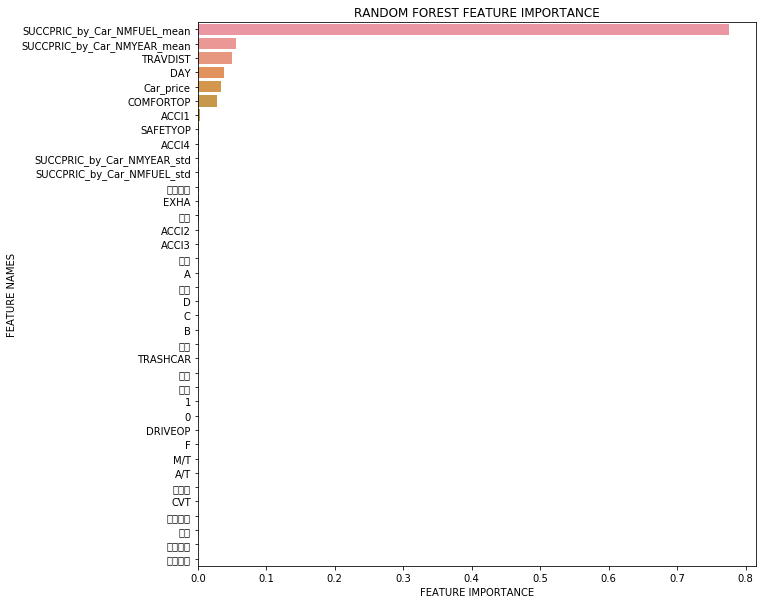

In [372]:
def plot_feature_importance(importance_, features_,model_type):
      dict_ = {'feature importance' : importance_, 'features' : features_}
      df = pd.DataFrame(dict_)
      df.sort_values(by=['feature importance'], ascending=False,inplace=True)
      plt.figure(figsize=(10,10))
      sns.barplot(x=df['feature importance'], y=df['features'])
      plt.title(model_type + 'FEATURE IMPORTANCE')
      plt.xlabel('FEATURE IMPORTANCE')
      plt.ylabel('FEATURE NAMES')

      
plot_feature_importance(best_rf.feature_importances_, X_val.columns, 'RANDOM FOREST ')

In [373]:
# rf의 feature importance로 확인한 상위 변수만을 selection 하여 , 좀더 generalize한 모델을 학습
selected_col = ['SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMYEAR_mean','TRAVDIST',
                'Car_price','COMFORTOP','DAY','SUCCPRIC_by_Car_NMFUEL_std','ACCI1','ACCI4','SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC_by_Car_NMYEAR_std']
               
X_train_norm_sel = X_train_norm.loc[:,selected_col]
X_val_norm_sel = X_val_norm.loc[:,selected_col]
best_mse2,best_rf2,best_parameter2 = runRandomForest(X_train_norm_sel,y_train,X_val_norm_sel,y_val)

n_estimator :  200  max_depth :  30
VALID 중고차 낙찰가 MSE:  200281249260.32846
VALID 중고차 낙찰가 MAE:  277700.5856681349
**************************************************


In [374]:
predicted = best_rf2.predict(X_val_norm_sel)

print('중고차 낙찰가 MSE: ',np.mean(np.square(predicted-y_val)))
print('중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_val)))
print('Best parameters : [', best_parameter2[0], ', ',best_parameter2[1],']' )

중고차 낙찰가 MSE:  200281249260.32846
중고차 낙찰가 MAE:  277700.5856681349
Best parameters : [ n_estimator :200 ,  max_depth :30 ]


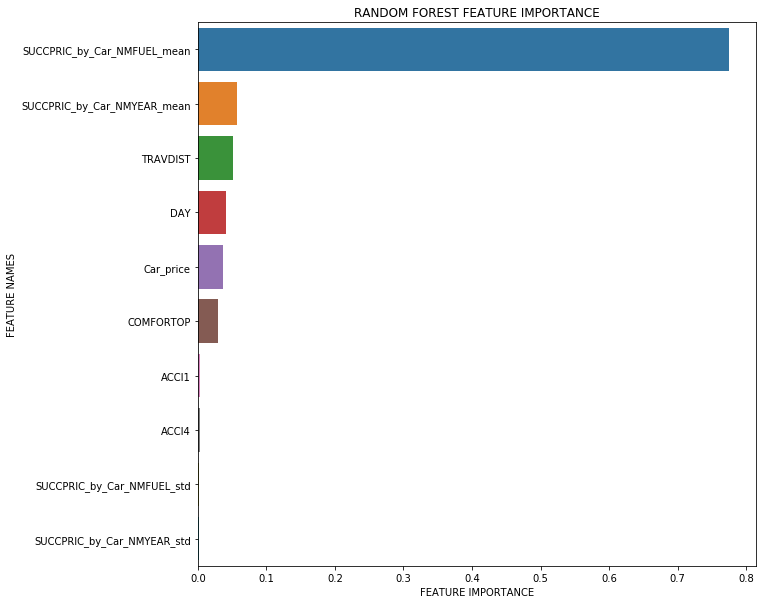

In [375]:
plot_feature_importance(best_rf2.feature_importances_, X_val_norm_sel.columns, 'RANDOM FOREST ')

# 3. System Implementation
## df_test에 기반하여 실제 사용을 위한 system implemetation 작업 진행

In [376]:
def remove_test_outliers(df_):
    outliers1 = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1))
    outliers2 = np.where((df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2))
    outliers3 = np.where((df_['NC_GRADE_PRICE']>ub_3))
    outliers4 = np.where((df_['SHIPPING_PRICE']<5000000)|(df_['SHIPPING_PRICE']>ub_4))
    outliers5 = np.where((df_['NEWCARPRIC']<5000000)|(df_['NEWCARPRIC']>ub_5))
    #outliers6 = np.where((df_['SUCCPRIC']>ub_6)) 
    
    df_['EXHA'][outliers1[0]]= np.nan
    df_['TRAVDIST'][outliers2[0]]=np.nan
    df_['NC_GRADE_PRICE'][outliers3[0]]=np.nan
    df_['SHIPPING_PRICE'][outliers4[0]]=np.nan
    df_['NEWCARPRIC'][outliers5[0]]=np.nan
    #df_['SUCCPRIC'][outliers6[0]]=np.nan  
    
    return df_

In [377]:
def make_cat_test(df,CATEGORICAL):
    df_ = df.loc[:,['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4',
                    'TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP','Car_price',
                    'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 
                    'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']]
    for i in CATEGORICAL :
        cate_i = pd.get_dummies(df.loc[:, i])
        df_[cate_i.columns] = cate_i
        
    #df_.dropna(inplace=True) ############################ 
    #print(df_.isnull().sum())
    return df_

In [388]:
df_test = pd.read_csv('./Kia_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'|


column SHIPPING_PRICE have 8 null value 

column NC_GRADE_PRICE have 1 null value 

AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                              0
SUCCYMD                             0
CARNM                               0
CHASNO                              0
CARREGIYMD                          0
YEAR                                0
MISSNM                              0
FUELNM                              0
COLOR                               0
EXHA                                0
TRAVDIST                            0
USEUSENM                            0
OWNECLASNM                          0
INNEEXPOCLASCD_YN                   0
NEWCARPRIC                          0
SUCCPRIC                            0
YEARCHK                             0
BONET                               0
FRONT_LEFT_FENDER                   0
FRONT_RIGHT_FENDER                  0
FRONT_LEFT_DOOR                     0
FRONT_RIGHT_DOOR                    0
BACK_LEFT_DOOR                      0
BA

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

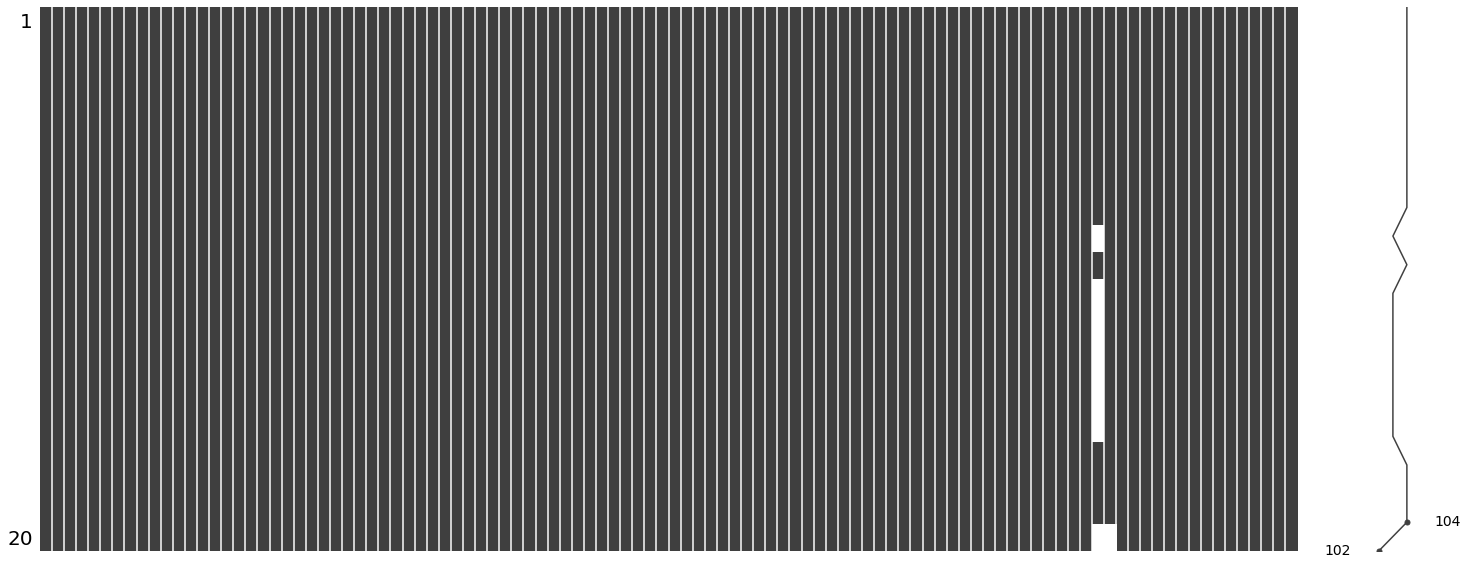

In [389]:
# df_test = pd.read_csv('./ADX/Data_UsedCarPrediction/Kia_testset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
# y_real = []
# for i in np.array(df_test.loc[:, 'SUCCPRIC']) :
#    y_real.append(i)
df_test_= df_test.copy()
df_test_ = NullFunc(df_test_)
df_test_=ChangeType(df_test_)
##############################
#remove_test_outliers(df_test_)
#############################

df_test_ = cal_accidents(df_test_)
df_test_ = cal_options(df_test_)
df_test_ = car_name_split(df_test_)
#df_test_ = remove_outliers_test(df_test_, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6)
df_test_ = set_price_mean_test(df_test_,df_ship_price_mean, df_nc_price_mean, df_new_price_mean)
df_test_ = set_car_price(df_test_)
df_test_ = car_year_name(df_test_)
df_test_ = set_SUCCPRIC_mean_test(df_test_,df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR)
df_test_.set_index('GOODNO', inplace=True)
df_test_ = make_day(df_test_)
df_test_ = remove_column(df_test_)

In [390]:
df_test_ = make_cat_test(df_test_,CATEGORICAL)
df_test_.isnull().sum()
X_test = df_test_.copy()
X_test_norm = X_test.copy()
X_test_norm.loc[:, numerical_col] = z_normalize_val(X_test, numerical_col, cache)
#test를 원핫인코딩 하면 categorical 변수의 수가 trainging data의 변수와 차이가 발생하므로
#training data의 컬럼을 가져와서 test data에 기존 training 변수들을 추가
final_df = pd.DataFrame(columns=X_train_norm.columns)
final_df_ = pd.concat([final_df,X_test_norm],axis=0)

In [391]:
final_df_.head()
final_df_.shape

(20, 39)

In [392]:
 y_real = []
for i in np.array(final_df_.loc[:, 'SUCCPRIC']) :
    y_real.append(i)


final_df_.drop(['SUCCPRIC'],axis=1,inplace=True)
#test에 없는 것들은 0값으로 입력(catergorical data만 없었기 때문)
final_df_ = final_df_.fillna(0)



In [393]:
def eval_indicator(y_true , y_pred):
    
    from sklearn import metrics
    import numpy as np 
    
    def mape(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    MSE = metrics.mean_squared_error(y_true ,y_pred )
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_true ,y_pred )
    MAPE = mape(y_true ,y_pred )
    eval_ = {"MSE" : [MSE] , "RMSE" : [RMSE] , "MAE" : [MAE] , "MAPE" : [MAPE]}
    eval_ = pd.DataFrame(eval_)
    eval_.index = ['Values']
    
    return eval_

In [394]:
#모든 변수 모델을 사용
print('중고차 TEST MSE: ', np.mean(np.square(best_rf.predict(final_df_) - y_real)))
print('중고차 TEST MAE: ', np.mean(np.abs(best_rf.predict(final_df_) - y_real)))
eval_indicator(y_real , best_rf.predict(final_df_))


중고차 TEST MSE:  1767097653875.0
중고차 TEST MAE:  934547.5


,MSE,RMSE,MAE,MAPE
Values,1.767098e+12,1.329322e+06,934547.5,13.642453


In [395]:
 def mape(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        df = []
        df.append(((y_true - y_pred) / y_true) )
        return df

In [396]:
mape = mape(y_real , best_rf.predict(final_df_))
print(mape)

[array([ 0.02329464,  0.02197368,  0.11107895,  0.16911832, -0.0200969 ,
        0.25262257,  0.03187654,  0.14202479, -0.43269697,  0.24373228,
       -0.10073529, -0.07953571, -0.05856522,  0.02215706, -0.08      ,
       -0.13140625,  0.33271591,  0.19219355,  0.06208262,  0.22058333])]


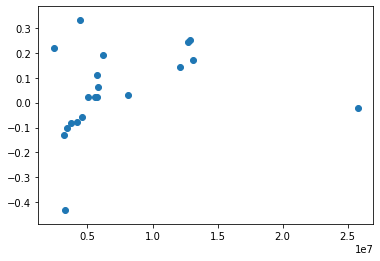

In [397]:
plt.scatter(x=y_real, y= mape)

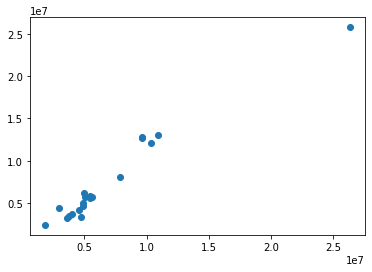

In [398]:
plt.scatter(x=best_rf.predict(final_df_), y= y_real)

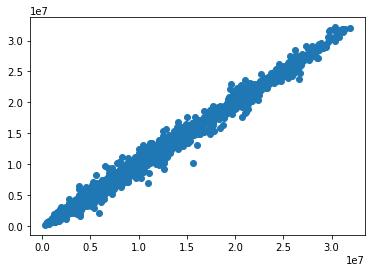

In [160]:
plt.scatter(x=predicted, y= y_val)

In [167]:
a = best_rf.predict(final_df_)

11525750.0

In [172]:
np.where(best_rf.predict(final_df_)>40000000)

(array([], dtype=int64),)

In [121]:
def remove_test_outliers(df_):
    outliers1 = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1))
    outliers2 = np.where((df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2))
    outliers3 = np.where((df_['NC_GRADE_PRICE']>ub_3))
    outliers4 = np.where((df_['SHIPPING_PRICE']<5000000)|(df_['SHIPPING_PRICE']>ub_4))
    outliers5 = np.where((df_['NEWCARPRIC']<5000000)|(df_['NEWCARPRIC']>ub_5))
    outliers6 = np.where((df_['SUCCPRIC']>ub_6)) 
    
    df_['EXHA'][outliers1[0]]= np.nan
    df_['TRAVDIST'][outliers2[0]]=np.nan
    df_['NC_GRADE_PRICE'][outliers3[0]]=np.nan
    df_['SHIPPING_PRICE'][outliers4[0]]=np.nan
    df_['NEWCARPRIC'][outliers5[0]]=np.nan
    df_['SUCCPRIC'][outliers6[0]]=np.nan  
    
    return df_

column EXHA have 1 null value 

column USEUSENM have 58 null value 

column OWNECLASNM have 10 null value 

column NEWCARPRIC have 1969 null value 

column DT_MODEL_KEY have 1 null value 

column MJ_GRADE_KEY have 13 null value 

column DT_GRADE_KEY have 313 null value 

column NC_GRADE_KEY have 2142 null value 

column SHIPPING_PRICE have 2526 null value 

column NC_GRADE_PRICE have 2248 null value 

AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                                 0
SUCCYMD                                0
CARNM                                  0
CHASNO                                 0
CARREGIYMD                             0
YEAR                                   0
MISSNM                                 0
FUELNM                                 0
COLOR                                  0
EXHA                                   1
TRAVDIST                               0
USEUSENM                              58
OWNECLASNM                            10
INNEEXPOCLASCD_YN     

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A 

DAY                              0
EXHA                           121
TRAVDIST                       394
ACCI1                            0
ACCI2                            0
ACCI3                            0
ACCI4                            0
TRASHCAR                         0
SAFETYOP                         0
DRIVEOP                          0
COMFORTOP                        0
Car_price                       15
SUCCPRIC_by_Car_NMFUEL_mean      3
SUCCPRIC_by_Car_NMFUEL_std       0
SUCCPRIC_by_Car_NMYEAR_mean      7
SUCCPRIC_by_Car_NMYEAR_std       0
SUCCPRIC                       205
A/T                              0
CVT                              0
M/T                              0
A                                0
B                                0
C                                0
D                                0
F                                0
렌트                               0
리스                               0
사업                               0
업무                  

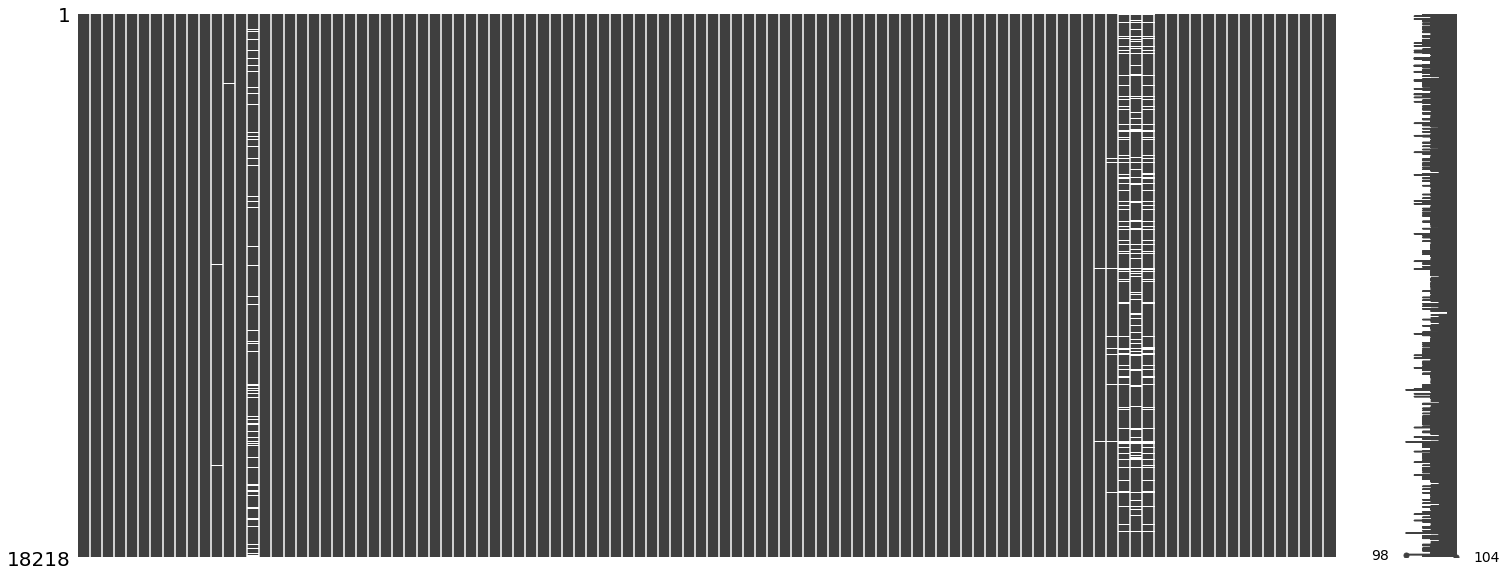

In [128]:
df_test_ = pd.read_csv('Kia_testset_sample2.csv', encoding='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
df_test_ = NullFunc(df_test_)
df_test_ =ChangeType(df_test_)
##############################
df_test_ = remove_test_outliers(df_test_)
#############################

df_test_ = cal_accidents(df_test_)
df_test_ = cal_options(df_test_)
df_test_ = car_name_split(df_test_)
#df_test_ = remove_outliers_test(df_test_, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6)
df_test_ = set_price_mean_test(df_test_,df_ship_price_mean, df_nc_price_mean, df_new_price_mean)
df_test_ = set_car_price(df_test_)
df_test_ = car_year_name(df_test_)
df_test_ = set_SUCCPRIC_mean_test(df_test_,df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR)
df_test_.set_index('GOODNO', inplace=True)
df_test_ = make_day(df_test_)
df_test_ = remove_column(df_test_)
df_test_ = make_test_cat(df_test_,CATEGORICAL)
df_test_.isnull().sum()


In [132]:
X_test = df_test_.copy()
X_test_norm = X_test.copy()
X_test_norm.loc[:, numerical_col] = z_normalize_val(X_test, numerical_col, cache)
#test를 원핫인코딩 하면 categorical 변수의 수가 trainging data의 변수와 차이가 발생하므로
#training data의 컬럼을 가져와서 test data에 기존 training 변수들을 추가
final_df = pd.DataFrame(columns=X_train_norm.columns)
final_df_ = pd.concat([final_df,X_test_norm],axis=0)
final_df_.head()

,DAY,EXHA,TRAVDIST,ACCI1,ACCI2,ACCI3,ACCI4,TRASHCAR,SAFETYOP,DRIVEOP,...,개인,개인사업,법인,법인상품,상품용,재외국인,종교단체,0,1,SUCCPRIC
1512A2469,0.381846,-1.088043,-0.990198,-0.814881,-0.334109,-0.195675,-0.607630,-0.250988,-2.347495,-0.05142,...,0,0,1,0,0,0,NaN,1,0,4300000.0
1512A2364,-0.663160,-0.226563,-0.499347,-0.814881,-0.334109,-0.195675,-0.607630,-0.250988,0.759138,-0.05142,...,0,0,1,0,0,0,NaN,1,0,11650000.0
1512A2319,-1.046798,-0.239485,-1.001643,-0.814881,-0.334109,-0.195675,-0.607630,-0.250988,0.759138,-0.05142,...,0,0,1,0,0,0,NaN,1,0,12350000.0
1512A1643,-0.608046,0.347757,0.490393,-0.814881,-0.334109,-0.195675,-0.607630,-0.250988,-0.794178,-0.05142,...,0,0,1,0,0,0,NaN,1,0,5900000.0
1512A1371,0.040355,0.347757,-0.097844,1.864564,1.343369,-0.195675,0.950793,-0.250988,-0.794178,-0.05142,...,0,0,1,0,0,0,NaN,1,0,4730000.0


In [135]:
 y_real = []
 for i in np.array(final_df_.loc[:, 'SUCCPRIC']) :
   y_real.append(i)


final_df_.drop(['SUCCPRIC'],axis=1,inplace=True)
#test에 없는 것들은 0값으로 입력(catergorical data만 없었기 때문)
final_df_ = final_df_.fillna(0)



In [136]:
final_df_.shape

(18218, 38)

In [137]:
X_test_norm_sel = X_test_norm.loc[:,selected_col]

In [138]:
def eval_indicator(y_true , y_pred):
    
    from sklearn import metrics
    import numpy as np 
    
    def mape(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    MSE = metrics.mean_squared_error(y_true ,y_pred )
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_true ,y_pred )
    MAPE = mape(y_true ,y_pred )
    eval_ = {"MSE" : [MSE] , "RMSE" : [RMSE] , "MAE" : [MAE] , "MAPE" : [MAPE]}
    eval_ = pd.DataFrame(eval_)
    eval_.index = ['Values']
    
    return eval_

In [139]:
final_df_.isnull().sum()

DAY                            0
EXHA                           0
TRAVDIST                       0
ACCI1                          0
ACCI2                          0
ACCI3                          0
ACCI4                          0
TRASHCAR                       0
SAFETYOP                       0
DRIVEOP                        0
COMFORTOP                      0
Car_price                      0
SUCCPRIC_by_Car_NMFUEL_mean    0
SUCCPRIC_by_Car_NMFUEL_std     0
SUCCPRIC_by_Car_NMYEAR_mean    0
SUCCPRIC_by_Car_NMYEAR_std     0
A/T                            0
CVT                            0
M/T                            0
A                              0
B                              0
C                              0
D                              0
F                              0
렌트                             0
리스                             0
사업                             0
업무                             0
자가                             0
개인                             0
개인사업      

In [141]:
#모든 변수 모델을 사용
print('중고차 TEST MSE: ', np.mean(np.square(best_rf.predict(final_df_) - y_real)))
print('중고차 TEST MAE: ', np.mean(np.abs(best_rf.predict(final_df_) - y_real)))
eval_indicator(y_real , best_rf.predict(final_df_))

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 38 

In [ ]:
plt.scatter(x=best_rf.predict(final_df_), y= y_real)

In [ ]:
X_test_norm_sel = X_test_norm.loc[:,selected_col]

In [ ]:
def eval_indicator(y_true , y_pred):
    
    from sklearn import metrics
    import numpy as np 
    
    def mape(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    MSE = metrics.mean_squared_error(y_true ,y_pred )
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_true ,y_pred )
    MAPE = mape(y_true ,y_pred )
    eval_ = {"MSE" : [MSE] , "RMSE" : [RMSE] , "MAE" : [MAE] , "MAPE" : [MAPE]}
    eval_ = pd.DataFrame(eval_)
    eval_.index = ['Values']
    
    return eval_

In [ ]:
#모든 변수 모델을 사용
print('중고차 TEST MSE: ', np.mean(np.square(best_rf.predict(final_df_) - y_real)))
print('중고차 TEST MAE: ', np.mean(np.abs(best_rf.predict(final_df_) - y_real)))
eval_indicator(y_real , best_rf.predict(final_df_))

In [ ]:
plt.scatter(x=best_rf.predict(final_df_), y= y_real)

In [ ]:
#선택된 변수 모델을 사용
print('중고차 TEST MSE: ', np.mean(np.square(best_rf2.predict(X_test_norm_sel) - y_real)))
print('중고차 TEST MAE: ', np.mean(np.abs(best_rf2.predict(X_test_norm_sel) - y_real)))
eval_indicator(y_real , best_rf2.predict(X_test_norm_sel))
#######################################

In [ ]:
plt.scatter(x=predicted, y= y_val)